# Grover's Algorithm

In [1]:
from isotropic.algos.grover import (
    get_grover_circuit,
    optimal_num_iterations,
    get_grover_answer,
)
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Operator

## Oracle

We first implement the oracle that will add a phase to our desired search item. 

**Note the negative sign on one of the diagonal entries.**

In [2]:
U_w = Operator(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
    ]
)

In [3]:
num_qubits = 3

## Grover's Circuit

Let's first find the optimal number of iterations

In [4]:
optimal_iterations = optimal_num_iterations(num_solutions=1, num_qubits=num_qubits)

We can now build the circuit and visualise it

In [5]:
grover_circuit = get_grover_circuit(num_qubits, U_w, optimal_iterations)

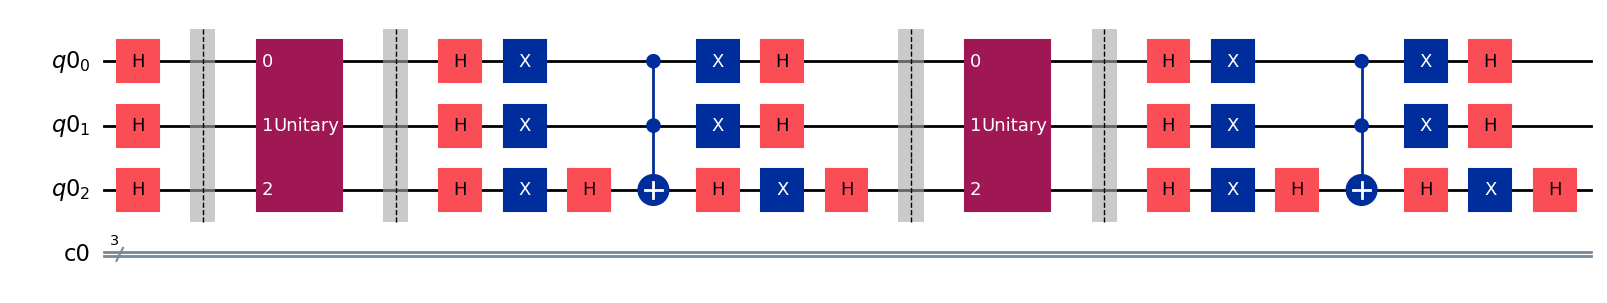

In [6]:
grover_circuit.draw("mpl")

Once the circuit of Grover's algorithm for this particular case is constructed, we execute it to see the results:

In [7]:
grover_circuit.measure_all(add_bits=False)
statevectorsampler = StatevectorSampler()
result = statevectorsampler.run([grover_circuit]).result()

## Result

We can now look at the counts and the result of the grover's algorithm.

In [8]:
counts, answer = get_grover_answer(result)

In [9]:
print(answer)

011


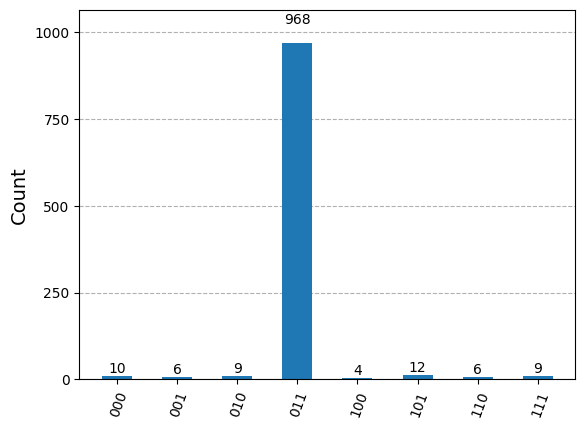

In [10]:
plot_histogram(counts)